### Assignment for Data Analyst 

#### Import all the requirments module in python

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import csv file in python 

In [2]:
os.chdir('E:\\Nxtwave\\data')
os.listdir()

['day_wise_user_activity.csv',
 'discussion_feedback_details.csv',
 'learning_resource_details.csv',
 'users_basic_details.csv']

In [3]:
learning_resource = pd.read_csv('learning_resource_details.csv')
user_details = pd.read_csv('users_basic_details.csv')
user_feedback = pd.read_csv('discussion_feedback_details.csv')

In [4]:
print('learning_resource Data')
print('Number of instance : ', learning_resource.shape[0])
print('Number of feature  : ', learning_resource.shape[1])

learning_resource Data
Number of instance :  889
Number of feature  :  8


#### First five Observations

In [5]:
learning_resource.head()

,program_id,program_title,course_id,course_title,topic_id,unit_id,unit_type,unit_duration_in_mins
0,prg_1,Backend Developer,course_1,Node JS,topic_1,unit_1,PRACTICE,25
1,prg_1,Backend Developer,course_1,Node JS,topic_1,unit_2,PRACTICE,30
2,prg_1,Backend Developer,course_1,Node JS,topic_1,unit_3,LEARNING_SET,5
3,prg_1,Backend Developer,course_1,Node JS,topic_1,unit_4,LEARNING_SET,15
4,prg_1,Backend Developer,course_1,Node JS,topic_1,unit_5,PRACTICE,2000


#### Basic information about Feature

In [6]:
learning_resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   program_id             889 non-null    object
 1   program_title          878 non-null    object
 2   course_id              889 non-null    object
 3   course_title           889 non-null    object
 4   topic_id               889 non-null    object
 5   unit_id                889 non-null    object
 6   unit_type              889 non-null    object
 7   unit_duration_in_mins  889 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 55.7+ KB


#### Create a count function n_count

In [7]:
def n_count(dataframe, var1):
    '''Single Feature unique value count in a dataframe'''
    count = 0
    items = []
    for i in dataframe[var1].unique():
        count = count + 1
        items.append(i)
        
    return print(f'{count} unique elements in {var1}\n{items}')

#### Number of programs

In [8]:
n_count(learning_resource, 'program_id')

14 unique elements in program_id
['prg_1', 'prg_2', 'prg_3', 'prg_4', 'prg_5', 'prg_6', 'prg_7', 'prg_8', 'prg_9', 'prg_10', 'prg_11', 'prg_12', 'prg_13', 'prg_14']


#### Number of program title

In [9]:
n_count(learning_resource, 'program_title')

14 unique elements in program_title
['Backend Developer', 'English for Beginners', 'XPM 4.0 Intermediate', 'Intro to CCBP 4.0 Intensive', 'Aptitude', 'Competitive Programming', 'Tech Foundations', 'Masterclass with Srividya Pranavi', 'Instruction Flows', 'AI-ML', 'Understanding 5G', 'XPM 4.0 Fundamentals', nan, 'CCBP 4.0 Academy - Intro']


#### Number of course title

In [10]:
n_count(learning_resource,'course_title')

21 unique elements in course_title
['Node JS', 'About Me', 'My Family', 'Self - talk', 'Introduction', 'Input - Output', 'Verbal Ability', 'Data Structures', 'My Daily routine', 'My Past & Future', 'Practical Python', 'Srividya Pranavi', 'Instruction Flows', 'Logical Reasoning', 'Fundamentals of ML', 'MASTERCLASS SERIES', 'Setting Priorities', 'Test Based Learning', 'Test Your Knowledge', 'CCBP 4.0 Introduction', 'Developer Foundations']


#### Create a Group by function of two Features

In [11]:
def group_by_count(dataframe, var1, var2):
    
    '''Two variable group by function'''
    
    group_fun   = dataframe.groupby(var1)[var2]
    group_value = group_fun.value_counts(normalize=True).mul(100)
    dataframe   = pd.DataFrame(group_value.reset_index(name = "Percentage"))
    return dataframe.round(1)

In [12]:
program_course = group_by_count(learning_resource, 'program_title','course_title')
program_course

,program_title,course_title,Percentage
0,AI-ML,Fundamentals of ML,100.0
1,Aptitude,Test Based Learning,59.5
2,Aptitude,Input - Output,22.6
3,Aptitude,Logical Reasoning,14.3
4,Aptitude,Verbal Ability,3.6
5,Backend Developer,Node JS,100.0
6,CCBP 4.0 Academy - Intro,CCBP 4.0 Introduction,100.0
7,Competitive Programming,Data Structures,100.0
8,English for Beginners,My Past & Future,27.5
9,English for Beginners,About Me,26.1


##### Graphical representation : Barplot

In [13]:
program_course_sort = program_course.sort_values('Percentage').head(10)
program_course_sort

,program_title,course_title,Percentage
4,Aptitude,Verbal Ability,3.6
3,Aptitude,Logical Reasoning,14.3
11,English for Beginners,My Family,21.7
2,Aptitude,Input - Output,22.6
10,English for Beginners,My Daily routine,24.6
9,English for Beginners,About Me,26.1
8,English for Beginners,My Past & Future,27.5
16,Tech Foundations,Developer Foundations,34.6
1,Aptitude,Test Based Learning,59.5
15,Tech Foundations,Practical Python,65.4


<AxesSubplot:xlabel='course_title', ylabel='Percentage'>

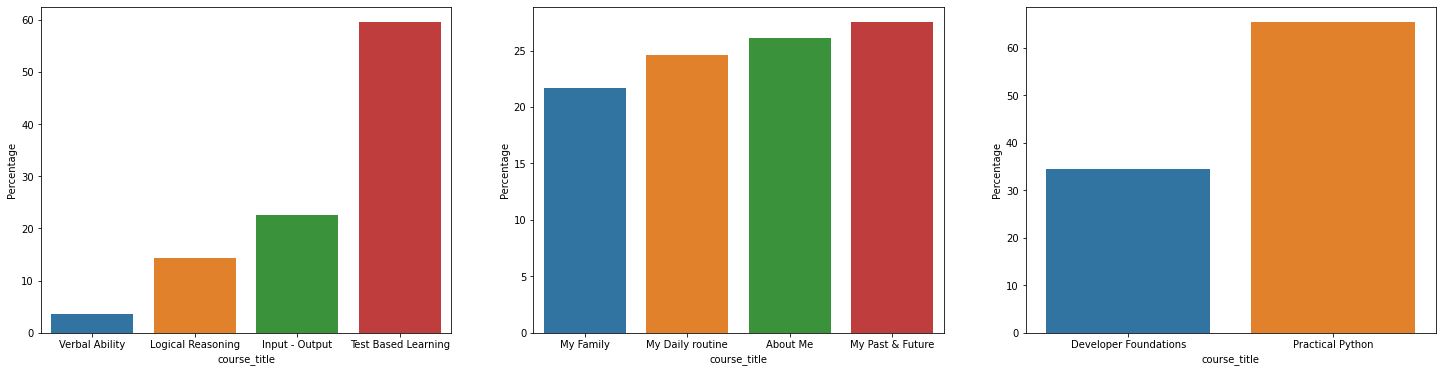

In [14]:
fig, axs = plt.subplots(ncols=3,figsize = (25,6))

sns.barplot(data = program_course_sort.loc[program_course_sort['program_title']=='Aptitude'],
            x = 'course_title',y = 'Percentage', ax = axs[0])
sns.barplot(data = program_course_sort.loc[program_course_sort['program_title']=='English for Beginners'],
            x = 'course_title',y = 'Percentage', ax = axs[1])
sns.barplot(data = program_course_sort.loc[program_course_sort['program_title']=='Tech Foundations'],
            x = 'course_title',y = 'Percentage', ax = axs[2])

In [15]:
def group_by_sum(dataframe, var1, var2):
    group_fun = dataframe.groupby(var1, as_index = False)[var2].sum()
    return group_fun

In [16]:
duration_by_course = group_by_sum(learning_resource, 'course_title', 'unit_duration_in_mins')
duration_by_course

,course_title,unit_duration_in_mins
0,About Me,690
1,CCBP 4.0 Introduction,575
2,Data Structures,8015
3,Developer Foundations,310
4,Fundamentals of ML,6826
5,Input - Output,340
6,Instruction Flows,481
7,Introduction,468
8,Logical Reasoning,285
9,MASTERCLASS SERIES,50


##### Graphical representation : Barplot

<AxesSubplot:xlabel='unit_duration_in_mins', ylabel='course_title'>

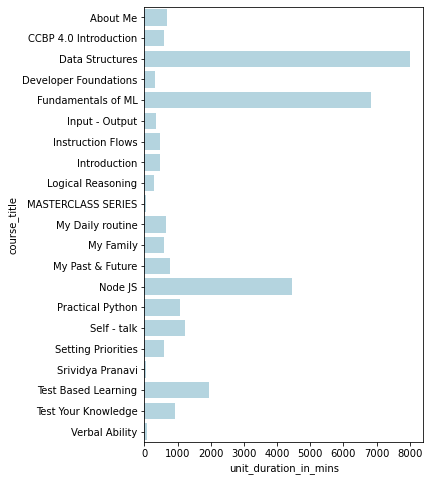

In [17]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(8)

sns.barplot(data = duration_by_course, color="lightblue",
            x ="unit_duration_in_mins", y ="course_title")

#### Top five havy duration course

In [18]:
top_5_dur_course = duration_by_course.sort_values('unit_duration_in_mins').tail(5)
top_5_dur_course

,course_title,unit_duration_in_mins
15,Self - talk,1210
18,Test Based Learning,1935
13,Node JS,4450
4,Fundamentals of ML,6826
2,Data Structures,8015


<AxesSubplot:xlabel='unit_duration_in_mins', ylabel='course_title'>

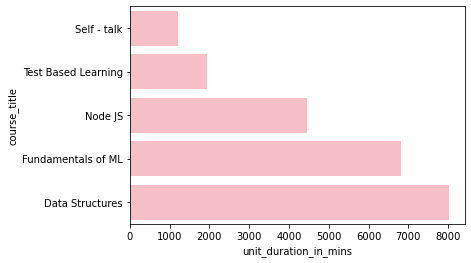

In [19]:
sns.barplot(data=top_5_dur_course, color="lightpink",
            x ="unit_duration_in_mins", y ="course_title")

In [20]:
print('User Details Data')
print('Number of instance: ',user_details.shape[0])
print('Number of feature : ', user_details.shape[1])

User Details Data
Number of instance:  53
Number of feature :  6


#### First five observations

In [21]:
user_details.head()

,user_id,gender,current_city,batch_start_datetime,referral_source,highest_qualification
0,user_1,FEMALE,Hyderabad,2022-02-02 10:00:00,youtube_ad,B.Tech
1,user_2,FEMALE,Bengaluru,2022-02-02 10:00:00,user_referral,10th Completed
2,user_3,MALE,Visakhapatnam,2022-02-02 10:00:00,website,Degree
3,user_4,MALE,Mumbai,2022-02-02 10:00:00,instagram,Intermediate
4,user_5,MALE,Hyderabad,2022-02-02 10:00:00,user_referral,M.Tech


#### Basic information about Features

In [22]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                53 non-null     object
 1   gender                 53 non-null     object
 2   current_city           53 non-null     object
 3   batch_start_datetime   53 non-null     object
 4   referral_source        53 non-null     object
 5   highest_qualification  53 non-null     object
dtypes: object(6)
memory usage: 2.6+ KB


From this given information each feature contain String value, this string represent category othewise plain text.

#### Percentage of Male and Female with percentage

In [23]:
def group_by_var1(dataframe, var1):
    
    '''Two variable group by function'''
    group_fun   = dataframe[var1]
    group_value = group_fun.value_counts(normalize=True).mul(100)
    dataframe   = pd.DataFrame(group_value.reset_index(name = "Percentage"))
    return dataframe.round(1)

In [24]:
user_gender = group_by_var1(user_details, 'gender')
user_gender

,index,Percentage
0,MALE,60.4
1,FEMALE,37.7
2,OTHER,1.9


#### Graphical Representation : Pie plot

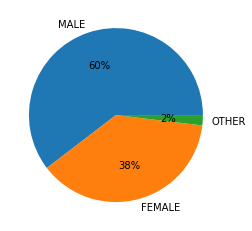

In [25]:
plt.pie(user_gender['Percentage'],labels = user_gender['index'], autopct='%.0f%%')
plt.show()

#### Percentage of Users in a City with percentage

In [26]:
user_city = group_by_var1(user_details, 'current_city')
user_city

,index,Percentage
0,Hyderabad,22.6
1,Mumbai,18.9
2,Bengaluru,17.0
3,Visakhapatnam,15.1
4,Delhi,15.1
5,Kochi,11.3


#### Graphical Representation : Pie plot

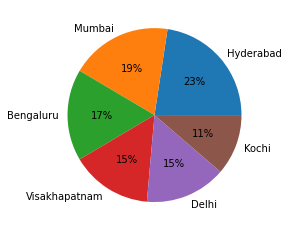

In [27]:
plt.pie(user_city['Percentage'],labels = user_city['index'], autopct='%.0f%%')
plt.show()

#### Percentage of Male Female in a city

In [28]:
gender_per_city = group_by_count(user_details, 'gender', 'current_city')
gender_per_city

,gender,current_city,Percentage
0,FEMALE,Hyderabad,40.0
1,FEMALE,Bengaluru,20.0
2,FEMALE,Visakhapatnam,20.0
3,FEMALE,Mumbai,10.0
4,FEMALE,Delhi,5.0
5,FEMALE,Kochi,5.0
6,MALE,Mumbai,25.0
7,MALE,Delhi,21.9
8,MALE,Bengaluru,15.6
9,MALE,Hyderabad,12.5


#### Graphical Representation : Bar plot

<AxesSubplot:xlabel='current_city', ylabel='Percentage'>

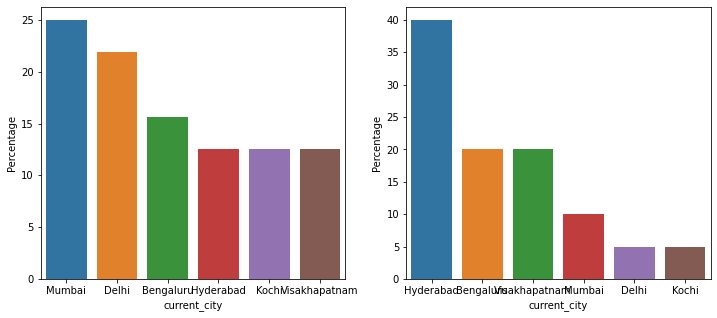

In [29]:
fig, axs = plt.subplots(ncols=2,figsize = (12,5))

sns.barplot(data = gender_per_city.loc[gender_per_city['gender']=='MALE'],
            x = 'current_city',y = 'Percentage', ax = axs[0])
sns.barplot(data = gender_per_city.loc[gender_per_city['gender']=='FEMALE'],
            x = 'current_city',y = 'Percentage', ax = axs[1])

In [30]:
print('User Feedback Data')
print('Number of instance: ', user_feedback.shape[0])
print('Number of feature : ', user_feedback.shape[1])

User Feedback Data
Number of instance:  27
Number of feature :  5


#### First five observations

In [31]:
user_feedback.head()

,feedback_id,feedback_submission_datetime,user_id,discussion_id,rating
0,fd_dis_1,2022-01-18 16:53:46,user_25,dis_47,3.0
1,fd_dis_2,2022-01-19 19:24:09,user_25,dis_48,5.0
2,fd_dis_3,2022-02-01 12:24:00,user_4,dis_2,5.0
3,fd_dis_4,2022-02-17 18:36:12,user_7,dis_60,5.0
4,fd_dis_5,2022-02-16 21:12:58,user_7,dis_61,5.0


#### Basic information of Features

In [32]:
user_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   feedback_id                   27 non-null     object 
 1   feedback_submission_datetime  27 non-null     object 
 2   user_id                       27 non-null     object 
 3   discussion_id                 27 non-null     object 
 4   rating                        26 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.2+ KB


#### Unique Rating

In [33]:
user_feedback['rating'].unique()

array([  3.,   5., 100.,   4.,  90.,  nan])

From this User rating two person give unexpected responce 100 and 90 and another one nan. For better analysis we replace by mean rating because total number of instance very low for this tranformation others columns information not loose.

In [34]:
rating = user_feedback['rating']
replace_list = []
count = 0
sum = 0
for i in range(len(rating)):
    if rating[i]>=0 and rating[i]<=5:
        sum = sum + rating[i]
        count = count + 1
    else:
        replace_list.append(i)

mean = sum/count
print('Total number of valid instance :', count)
print('Mean :', mean)
print('Replace instance :', replace_list)

Total number of valid instance : 24
Mean : 4.875
Replace instance : [11, 15, 26]


In [35]:
user_feedback['rating'] = user_feedback['rating'].replace([100, 90, np.nan], mean)
user_feedback['rating'].unique() 

array([3.   , 5.   , 4.875, 4.   ])

#### Marge two dataset User Details and user feedback 

In [36]:
data = pd.merge(user_details, user_feedback)
data.head()

,user_id,gender,current_city,batch_start_datetime,referral_source,highest_qualification,feedback_id,feedback_submission_datetime,discussion_id,rating
0,user_4,MALE,Mumbai,2022-02-02 10:00:00,instagram,Intermediate,fd_dis_3,2022-02-01 12:24:00,dis_2,5.000
1,user_4,MALE,Mumbai,2022-02-02 10:00:00,instagram,Intermediate,fd_dis_12,2022-02-01 19:36:00,dis_8,4.875
2,user_5,MALE,Hyderabad,2022-02-02 10:00:00,user_referral,M.Tech,fd_dis_19,2022-02-02 19:36:00,dis_5,5.000
3,user_7,MALE,Kochi,2022-02-02 10:00:00,youtube_ad,B.Tech,fd_dis_4,2022-02-17 18:36:12,dis_60,5.000
4,user_7,MALE,Kochi,2022-02-02 10:00:00,youtube_ad,B.Tech,fd_dis_5,2022-02-16 21:12:58,dis_61,5.000


#### Basic information about Features

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       27 non-null     object 
 1   gender                        27 non-null     object 
 2   current_city                  27 non-null     object 
 3   batch_start_datetime          27 non-null     object 
 4   referral_source               27 non-null     object 
 5   highest_qualification         27 non-null     object 
 6   feedback_id                   27 non-null     object 
 7   feedback_submission_datetime  27 non-null     object 
 8   discussion_id                 27 non-null     object 
 9   rating                        27 non-null     float64
dtypes: float64(1), object(9)
memory usage: 2.3+ KB


#### Gender and referral

In [38]:
gen_ref = group_by_count(data, 'gender', 'referral_source')
gen_ref

,gender,referral_source,Percentage
0,FEMALE,youtube_ad,44.4
1,FEMALE,website,33.3
2,FEMALE,instagram,22.2
3,MALE,instagram,61.1
4,MALE,youtube_ad,22.2
5,MALE,user_referral,16.7


#### Graphical Representation : Bar plot

<AxesSubplot:xlabel='referral_source', ylabel='Percentage'>

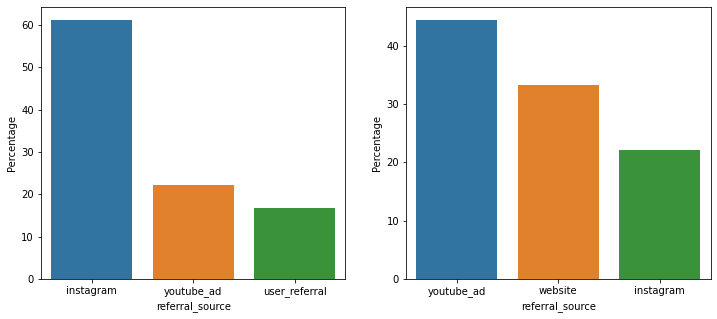

In [39]:
fig, axs = plt.subplots(ncols=2,figsize = (12,5))

sns.barplot(data = gen_ref.loc[gen_ref['gender']=='MALE'],
            x = 'referral_source',y = 'Percentage', ax = axs[0])
sns.barplot(data = gen_ref.loc[gen_ref['gender']=='FEMALE'],
            x = 'referral_source',y = 'Percentage', ax = axs[1])

#### Gender city and referral source

In [40]:
def group_by_var123(dataframe, var1, var2, var3):
    
    '''Two variable group by function'''
    
    group_fun   = dataframe.groupby([var1,var2])[var3]
    group_value = group_fun.value_counts(normalize=True).mul(100)
    dataframe   = pd.DataFrame(group_value.reset_index(name = "Percentage"))
    return dataframe.round(1)

In [41]:
group_by_var123(data, 'gender', 'current_city', 'referral_source')

,gender,current_city,referral_source,Percentage
0,FEMALE,Mumbai,instagram,100.0
1,FEMALE,Visakhapatnam,youtube_ad,50.0
2,FEMALE,Visakhapatnam,website,37.5
3,FEMALE,Visakhapatnam,instagram,12.5
4,MALE,Bengaluru,instagram,100.0
5,MALE,Delhi,instagram,100.0
6,MALE,Hyderabad,user_referral,100.0
7,MALE,Kochi,youtube_ad,80.0
8,MALE,Kochi,instagram,20.0
9,MALE,Mumbai,instagram,100.0
